In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/따릉이.csv')
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [2]:
col_rename = {'hour':'Time','hour_bef_temperature':'Temperature','hour_bef_precipitation':'Weather','hour_bef_windspeed':'Windspeed',
              'hour_bef_humidity':'Humidity','hour_bef_visibility':'Visibility','hour_bef_ozone':'Conc_ozone','hour_bef_pm10':'Conc_pm10',
              'hour_bef_pm2.5':'Conc_pm2.5', 'count':'Count'}

data = data.rename(columns = col_rename)
data = data.drop('id',axis = 1)
data = data.dropna()
data['Count'] = data['Count'].astype(int)
data.reset_index(drop=True, inplace=True )
data['Weather'] = data['Weather'].apply(lambda x : 'Rain' if x == 1.0 else 'Sunny')
data_rainy = data.groupby('Weather').get_group('Rain')
data_sunny = data.groupby('Weather').get_group('Sunny')
data_rainy.reset_index(drop=True, inplace=True)
data_sunny.reset_index(drop=True, inplace=True)

In [3]:
data_sunny.head()

,Time,Temperature,Weather,Windspeed,Humidity,Visibility,Conc_ozone,Conc_pm10,Conc_pm2.5,Count
0,13,20.1,Sunny,1.4,48.0,916.0,0.042,73.0,40.0,159
1,6,13.9,Sunny,0.7,79.0,1382.0,0.033,32.0,19.0,26
2,23,8.1,Sunny,2.7,54.0,946.0,0.040,75.0,64.0,57
3,18,29.5,Sunny,4.8,7.0,2000.0,0.057,27.0,11.0,431
4,2,13.6,Sunny,1.7,80.0,1073.0,0.027,34.0,15.0,39


In [4]:
data_rainy.head()

,Time,Temperature,Weather,Windspeed,Humidity,Visibility,Conc_ozone,Conc_pm10,Conc_pm2.5,Count
0,20,16.3,Rain,1.5,89.0,576.0,0.027,76.0,33.0,49
1,13,14.0,Rain,2.8,42.0,1518.0,0.030,49.0,37.0,5
2,17,11.5,Rain,3.0,91.0,555.0,0.036,29.0,21.0,64
3,18,18.0,Rain,1.9,82.0,685.0,0.044,99.0,42.0,15
4,17,14.6,Rain,2.7,84.0,1645.0,0.044,21.0,14.0,93


<AxesSubplot:>

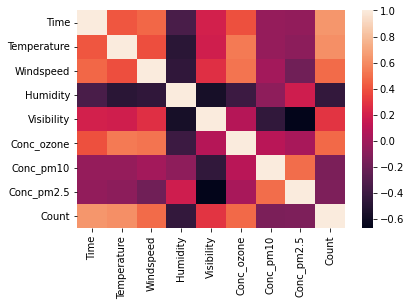

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

corr1 = data_sunny.corr()
sns.heatmap(corr1)
# 변수들간 유의미한 관계를 파악. 

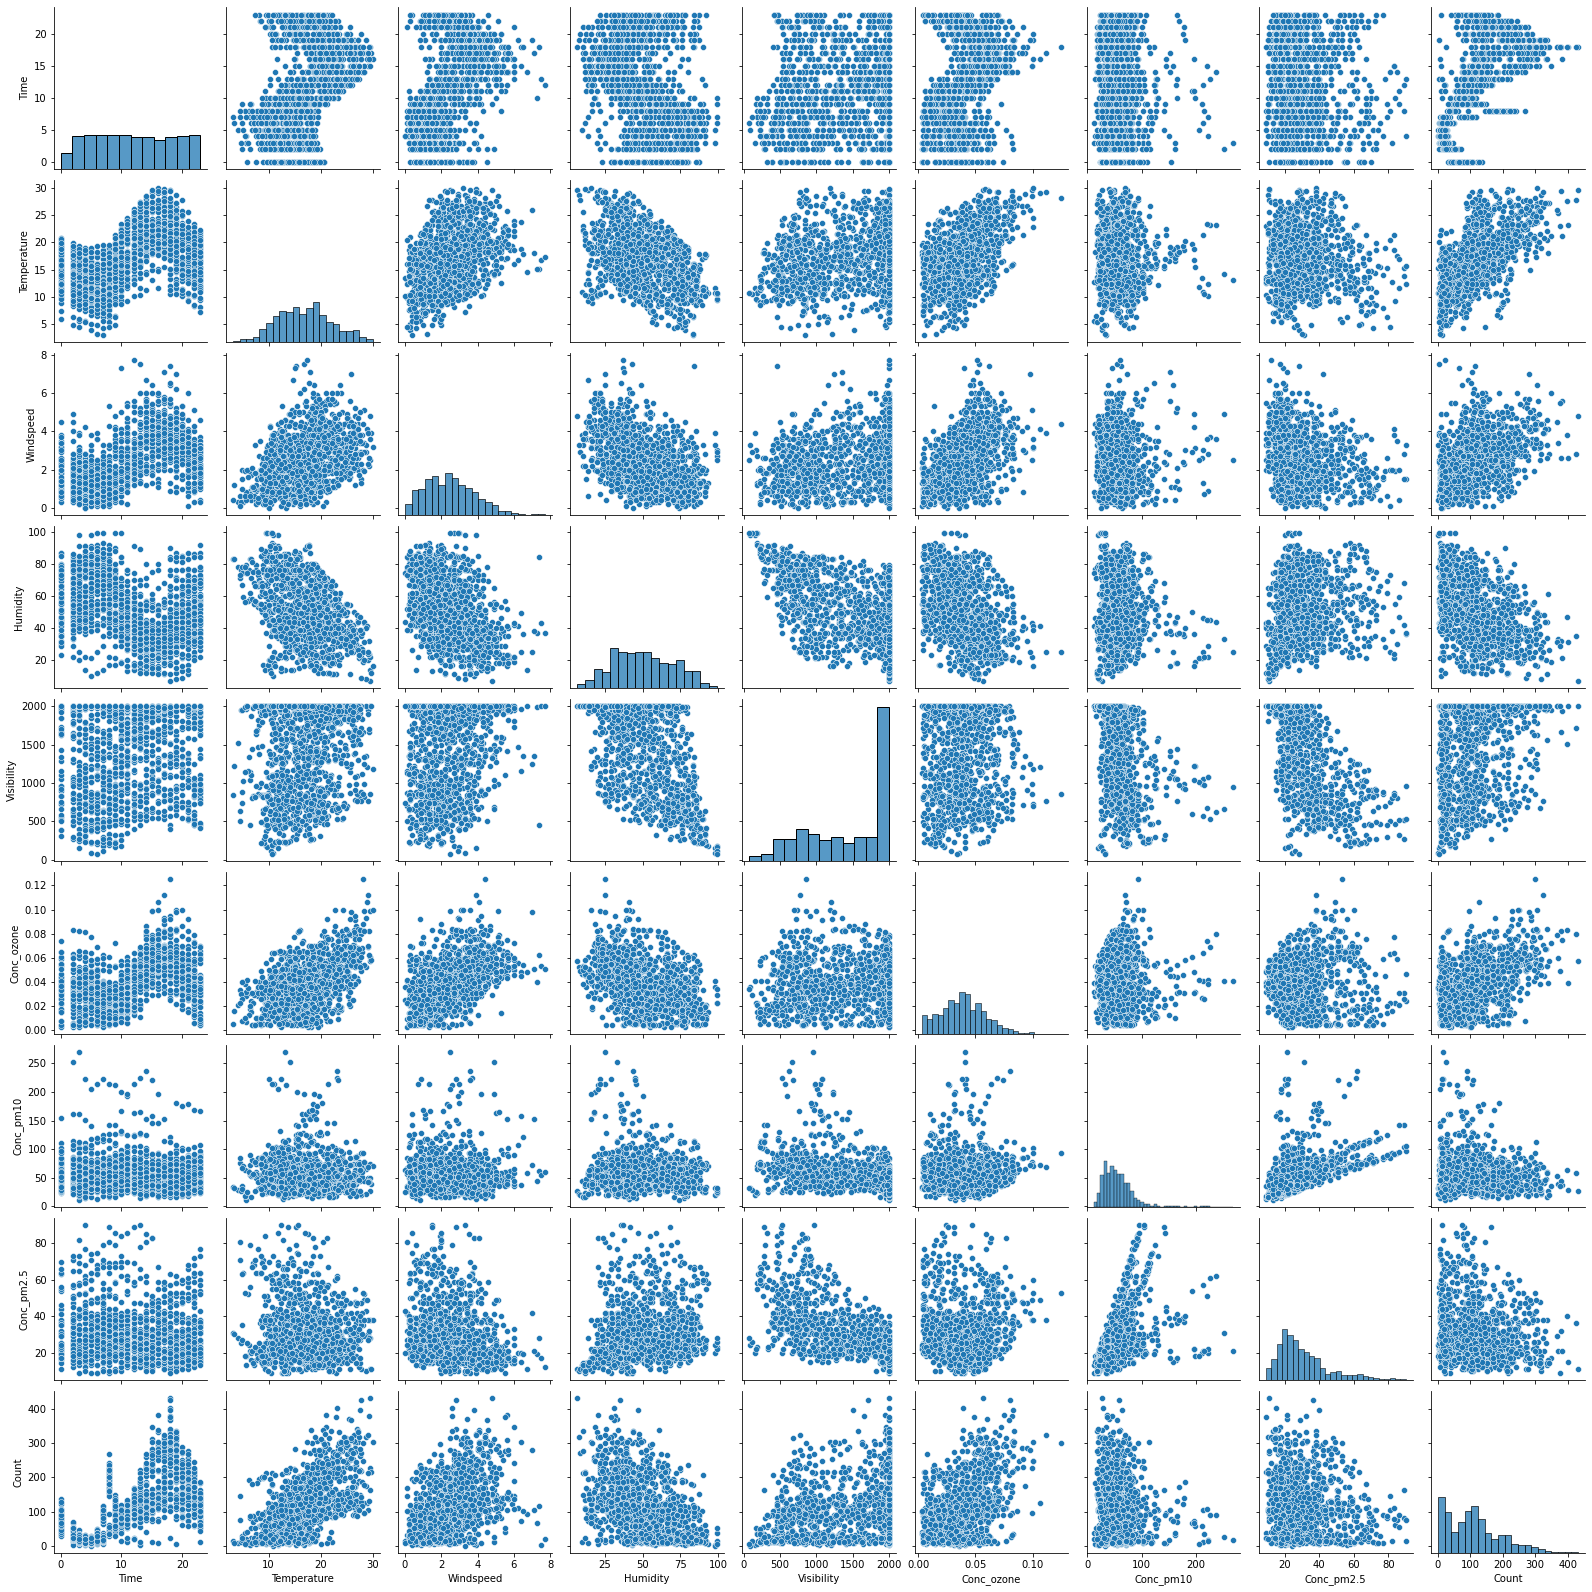

In [6]:
sns.pairplot(data=data_sunny)

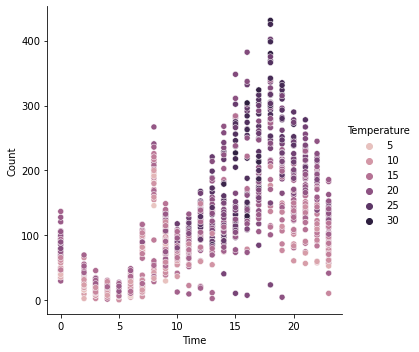

In [7]:
sns.relplot(data = data_sunny, x = 'Time', y = 'Count', hue = 'Temperature')
# 예상가능한 패턴, 밤, 새벽보다 오후 및 이른 저녁에 따릉이를 많이 이용.

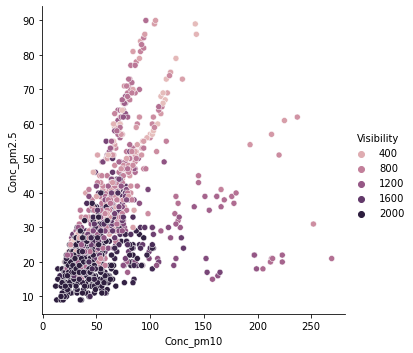

In [8]:
sns.relplot(data = data_sunny, x = 'Conc_pm10', y = 'Conc_pm2.5', hue = 'Visibility')
# PM2.5와 PM10 과의 관계에서 다소 특이한 패턴 확인할 수 있음.

In [9]:
## further algorithm을 통해 noise data를 제거하고, pm10, pm2.5와의 관계를 modeling 해 볼 수 있을 것 같다. 